**Étape 1 : Importer les bibliothèques**

D'abord, vous devez importer les bibliothèques nécessaires. Si shap n'est pas déjà installé dans votre environnement, vous devriez l'installer en utilisant "!pip install shap".

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
import pickle
import numpy as np


**Chargez les données fournies**

In [29]:
df = pd.read_csv('emploi_old_train.csv')

# Préparer les données
X = df.drop('target', axis=1)  # Remplacez 'colonne_cible' par le nom de votre colonne cible
y = df['target']  # La variable cible


In [30]:

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Étape 3 : Entraîner le classificateur Random Forest**

Ensuite, entraînez un classificateur Random Forest avec les données d'entraînement.

In [31]:

# Initialiser et entraîner le classificateur
model = RandomForestClassifier()
model.fit(X_train, y_train)


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


RandomForestClassifier()

**Étape 4 : Évaluer le modèle**

Évaluez le modèle en utilisant la précision comme métrique.

In [33]:
# Faire des prédictions et évaluer le modèle
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Précision : {accuracy}')


Précision : 0.7181612660135644


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


**Étape 5 : Calculer les valeurs SHAP et créer un résumé graphique**

Maintenant, calculez les valeurs SHAP et générez un résumé graphique. Cela nécessite la bibliothèque shap.

In [34]:
explainer = shap.TreeExplainer(model)
# Compute SHAP values
shap_values = explainer.shap_values(X_test)


In [35]:
shap_values[1].shape

(1327, 66)

In [36]:
X_test.shape

(1327, 66)

Glyph 146 missing from current font.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
Glyph 146 missing from current font.


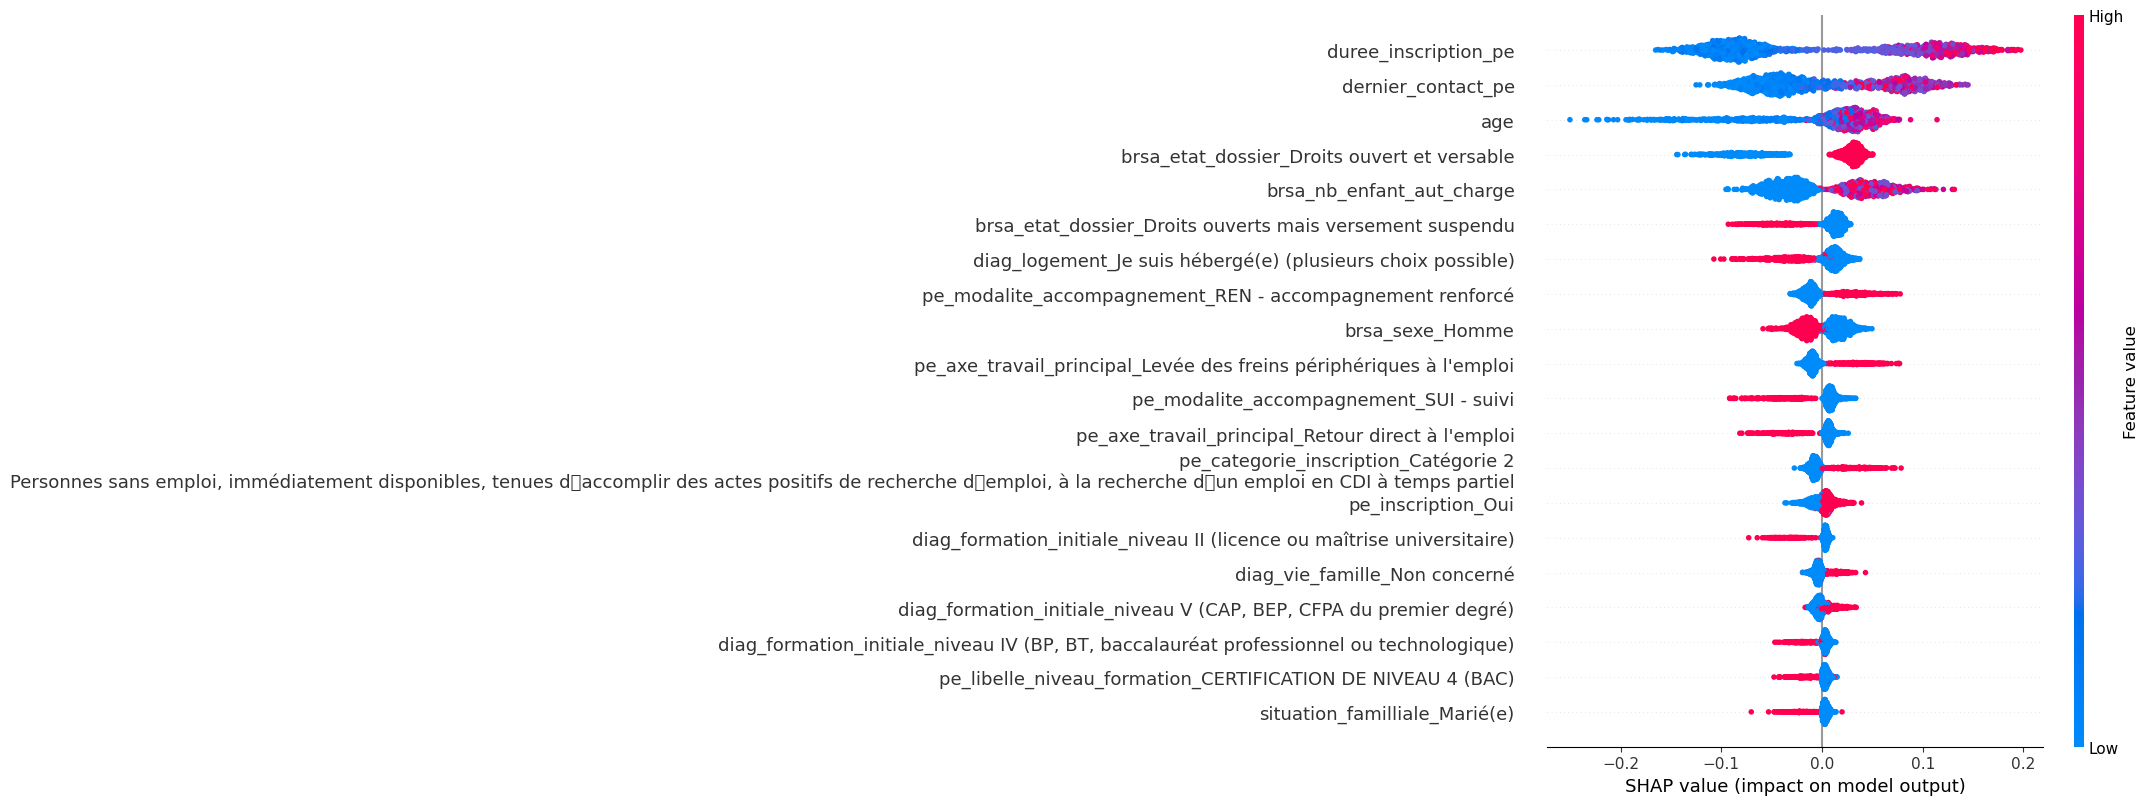

In [37]:

# Afficher les valeurs SHAP
shap.summary_plot(shap_values[1], X_test)


***Étape 6 : Utilisez la mesure suivant pour mesurer la simplicité du modèle***

"total_significant_shap" renvoie le nombre de features ayant plus d'1% de contribution dans l'explication du modèle. "percent_significant_shap" renvoie le pourcentage de features du dataset correspondant.

In [38]:

len_x = len(X.columns)
# Calculate significant SHAP counts for each class in a more concise way
significant_shap_counts = [np.sum(np.abs(values).mean(axis=0) / np.sum(np.abs(values).mean(axis=0)) > 0.01) for values in shap_values]

# Find the maximum count and calculate the percentage of significant SHAP values
total_significant_shap = max(significant_shap_counts)
percent_significant_shap = (total_significant_shap / len_x) * 100

print(f"Total significant shap: {total_significant_shap}")
print(f"Percent significant shap: {round(percent_significant_shap, 2)}%")

Total significant shap: 21
Percent significant shap: 31.82%


In [39]:
# Obtenir la liste des colonnes du dataframe filtré
masque_colonnes = X_test.columns.tolist()
pd.Series(masque_colonnes).to_csv('masque.csv', index=False)

***Étape 7 : Sauvegarder le modèle***

Enfin, sauvegardez le modèle entraîné en utilisant pickle.

In [40]:
# Sauvegarder le modèle dans un fichier
with open('num_etudiant.pkl', 'wb') as file:
    pickle.dump(model, file)
